In [1]:
import numpy as np
import pandas as pd
import os
import math
import random 
import cv2 as cv

from scipy import stats #Analysis 
from scipy.stats import norm 

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

1. Data Load
치매 예방을 위한 라이프로그 치매 분류

9,327 rows × 2 columns x 5 picture

For more details https://aihub.or.kr/problem_contest/nipa-learning-platform/6

In [2]:
# original data : data 

path = "./Dataset/pic_dataset2"

FAST_RUN = False
IMAGE_WIDTH=34
IMAGE_HEIGHT=34
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=1

filenames = os.listdir(path)
categories = []
sobee = []

# data = cv.imread('/content/gdrive/My Drive/CoLab/Dataset/pic_dataset/CN_0.png', 0)
# img = cv.resize(data, None, fx=28/349, fy=28/231)
# print(img/255)
# print(img.shape)

for filename in filenames:
    category = filename.split('_')[0]
    categories.append(category)
#    if category == 'CN':
#        categories.append(0)
#    elif  category == 'MCI':
#        categories.append(1)
#    else:
#        categories.append(2)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

df

,filename,category
0,CN_0.png,CN
1,CN_1.png,CN
2,CN_10.png,CN
3,CN_1000.png,CN
4,CN_1001.png,CN
...,...,...
9322,MCI_95.png,MCI
9323,MCI_96.png,MCI
9324,MCI_97.png,MCI
9325,MCI_98.png,MCI


In [3]:
df

,filename,category
0,CN_0.png,CN
1,CN_1.png,CN
2,CN_10.png,CN
3,CN_1000.png,CN
4,CN_1001.png,CN
...,...,...
9322,MCI_95.png,MCI
9323,MCI_96.png,MCI
9324,MCI_97.png,MCI
9325,MCI_98.png,MCI


2. EDA
9,327 rows × 66 columns

148명에 대한 데일리 라이프로그 데이터
크게 1. 기본 정보 2. 걸음거리 3.수면 4.컨버팅 데이터로 나눌 수 있겠습니다.

4. converting

CONVERT(activity_class_5min USING utf8)
CONVERT(activity_met_1min USING utf8)
CONVERT(sleep_hr_5min USING utf8)
CONVERT(sleep_hypnogram_5min USING utf8)
CONVERT(sleep_rmssd_5min USING utf8)
y variable

DIAG_NM
정상(CN), 경도인지 장애(MCI), 치매(Dem)

In [4]:
df.shape

(9327, 2)

In [5]:
y_data = df['category'].copy()

In [6]:
for i in range(len(filenames)):
  mypath = path + '/' + filenames[i]
  print(mypath)
  data = cv.imread(mypath, 0)
  img = cv.resize(data, None, fx=28/349, fy=28/231)
  img = img/255
  sobee.append(img)

./Dataset/pic_dataset2/CN_0.png
./Dataset/pic_dataset2/CN_1.png
./Dataset/pic_dataset2/CN_10.png
./Dataset/pic_dataset2/CN_1000.png
./Dataset/pic_dataset2/CN_1001.png
./Dataset/pic_dataset2/CN_1002.png
./Dataset/pic_dataset2/CN_1003.png
./Dataset/pic_dataset2/CN_1004.png
./Dataset/pic_dataset2/CN_1005.png
./Dataset/pic_dataset2/CN_1006.png
./Dataset/pic_dataset2/CN_1007.png
./Dataset/pic_dataset2/CN_1008.png
./Dataset/pic_dataset2/CN_1009.png
./Dataset/pic_dataset2/CN_1010.png
./Dataset/pic_dataset2/CN_1011.png
./Dataset/pic_dataset2/CN_1012.png
./Dataset/pic_dataset2/CN_1013.png
./Dataset/pic_dataset2/CN_1014.png
./Dataset/pic_dataset2/CN_1015.png
./Dataset/pic_dataset2/CN_1016.png
./Dataset/pic_dataset2/CN_1017.png
./Dataset/pic_dataset2/CN_1018.png
./Dataset/pic_dataset2/CN_1019.png
./Dataset/pic_dataset2/CN_1020.png
./Dataset/pic_dataset2/CN_1021.png
./Dataset/pic_dataset2/CN_1022.png
./Dataset/pic_dataset2/CN_1023.png
./Dataset/pic_dataset2/CN_1024.png
./Dataset/pic_dataset2/CN_10

./Dataset/pic_dataset2/CN_1711.png
./Dataset/pic_dataset2/CN_1712.png
./Dataset/pic_dataset2/CN_1713.png
./Dataset/pic_dataset2/CN_1714.png
./Dataset/pic_dataset2/CN_1715.png
./Dataset/pic_dataset2/CN_1716.png
./Dataset/pic_dataset2/CN_1717.png
./Dataset/pic_dataset2/CN_1718.png
./Dataset/pic_dataset2/CN_1719.png
./Dataset/pic_dataset2/CN_172.png
./Dataset/pic_dataset2/CN_1720.png
./Dataset/pic_dataset2/CN_1721.png
./Dataset/pic_dataset2/CN_1722.png
./Dataset/pic_dataset2/CN_1723.png
./Dataset/pic_dataset2/CN_1724.png
./Dataset/pic_dataset2/CN_1725.png
./Dataset/pic_dataset2/CN_1726.png
./Dataset/pic_dataset2/CN_1727.png
./Dataset/pic_dataset2/CN_1728.png
./Dataset/pic_dataset2/CN_1729.png
./Dataset/pic_dataset2/CN_173.png
./Dataset/pic_dataset2/CN_1730.png
./Dataset/pic_dataset2/CN_1731.png
./Dataset/pic_dataset2/CN_1732.png
./Dataset/pic_dataset2/CN_1733.png
./Dataset/pic_dataset2/CN_1734.png
./Dataset/pic_dataset2/CN_1735.png
./Dataset/pic_dataset2/CN_1736.png
./Dataset/pic_dataset2

./Dataset/pic_dataset2/CN_2249.png
./Dataset/pic_dataset2/CN_2250.png
./Dataset/pic_dataset2/CN_2251.png
./Dataset/pic_dataset2/CN_2252.png
./Dataset/pic_dataset2/CN_2253.png
./Dataset/pic_dataset2/CN_2254.png
./Dataset/pic_dataset2/CN_2255.png
./Dataset/pic_dataset2/CN_2256.png
./Dataset/pic_dataset2/CN_2257.png
./Dataset/pic_dataset2/CN_2258.png
./Dataset/pic_dataset2/CN_2259.png
./Dataset/pic_dataset2/CN_2260.png
./Dataset/pic_dataset2/CN_2261.png
./Dataset/pic_dataset2/CN_2262.png
./Dataset/pic_dataset2/CN_2263.png
./Dataset/pic_dataset2/CN_2264.png
./Dataset/pic_dataset2/CN_2265.png
./Dataset/pic_dataset2/CN_2266.png
./Dataset/pic_dataset2/CN_2267.png
./Dataset/pic_dataset2/CN_2268.png
./Dataset/pic_dataset2/CN_2269.png
./Dataset/pic_dataset2/CN_2270.png
./Dataset/pic_dataset2/CN_2271.png
./Dataset/pic_dataset2/CN_2272.png
./Dataset/pic_dataset2/CN_2273.png
./Dataset/pic_dataset2/CN_2274.png
./Dataset/pic_dataset2/CN_2275.png
./Dataset/pic_dataset2/CN_2276.png
./Dataset/pic_datase

./Dataset/pic_dataset2/CN_2584.png
./Dataset/pic_dataset2/CN_2585.png
./Dataset/pic_dataset2/CN_2586.png
./Dataset/pic_dataset2/CN_2587.png
./Dataset/pic_dataset2/CN_2588.png
./Dataset/pic_dataset2/CN_2589.png
./Dataset/pic_dataset2/CN_2590.png
./Dataset/pic_dataset2/CN_2591.png
./Dataset/pic_dataset2/CN_2592.png
./Dataset/pic_dataset2/CN_2593.png
./Dataset/pic_dataset2/CN_2594.png
./Dataset/pic_dataset2/CN_2595.png
./Dataset/pic_dataset2/CN_2596.png
./Dataset/pic_dataset2/CN_2597.png
./Dataset/pic_dataset2/CN_2598.png
./Dataset/pic_dataset2/CN_2599.png
./Dataset/pic_dataset2/CN_26.png
./Dataset/pic_dataset2/CN_2600.png
./Dataset/pic_dataset2/CN_2601.png
./Dataset/pic_dataset2/CN_2602.png
./Dataset/pic_dataset2/CN_2603.png
./Dataset/pic_dataset2/CN_2604.png
./Dataset/pic_dataset2/CN_2605.png
./Dataset/pic_dataset2/CN_2606.png
./Dataset/pic_dataset2/CN_2607.png
./Dataset/pic_dataset2/CN_2608.png
./Dataset/pic_dataset2/CN_2609.png
./Dataset/pic_dataset2/CN_2610.png
./Dataset/pic_dataset2

./Dataset/pic_dataset2/CN_2876.png
./Dataset/pic_dataset2/CN_2877.png
./Dataset/pic_dataset2/CN_2878.png
./Dataset/pic_dataset2/CN_2879.png
./Dataset/pic_dataset2/CN_288.png
./Dataset/pic_dataset2/CN_2880.png
./Dataset/pic_dataset2/CN_2881.png
./Dataset/pic_dataset2/CN_2882.png
./Dataset/pic_dataset2/CN_2883.png
./Dataset/pic_dataset2/CN_2884.png
./Dataset/pic_dataset2/CN_2885.png
./Dataset/pic_dataset2/CN_2886.png
./Dataset/pic_dataset2/CN_2887.png
./Dataset/pic_dataset2/CN_2888.png
./Dataset/pic_dataset2/CN_2889.png
./Dataset/pic_dataset2/CN_289.png
./Dataset/pic_dataset2/CN_2890.png
./Dataset/pic_dataset2/CN_2891.png
./Dataset/pic_dataset2/CN_2892.png
./Dataset/pic_dataset2/CN_2893.png
./Dataset/pic_dataset2/CN_2894.png
./Dataset/pic_dataset2/CN_2895.png
./Dataset/pic_dataset2/CN_2896.png
./Dataset/pic_dataset2/CN_2897.png
./Dataset/pic_dataset2/CN_2898.png
./Dataset/pic_dataset2/CN_2899.png
./Dataset/pic_dataset2/CN_29.png
./Dataset/pic_dataset2/CN_290.png
./Dataset/pic_dataset2/CN

./Dataset/pic_dataset2/CN_3197.png
./Dataset/pic_dataset2/CN_3198.png
./Dataset/pic_dataset2/CN_3199.png
./Dataset/pic_dataset2/CN_32.png
./Dataset/pic_dataset2/CN_320.png
./Dataset/pic_dataset2/CN_3200.png
./Dataset/pic_dataset2/CN_3201.png
./Dataset/pic_dataset2/CN_3202.png
./Dataset/pic_dataset2/CN_3203.png
./Dataset/pic_dataset2/CN_3204.png
./Dataset/pic_dataset2/CN_3205.png
./Dataset/pic_dataset2/CN_3206.png
./Dataset/pic_dataset2/CN_3207.png
./Dataset/pic_dataset2/CN_3208.png
./Dataset/pic_dataset2/CN_3209.png
./Dataset/pic_dataset2/CN_321.png
./Dataset/pic_dataset2/CN_3210.png
./Dataset/pic_dataset2/CN_3211.png
./Dataset/pic_dataset2/CN_3212.png
./Dataset/pic_dataset2/CN_3213.png
./Dataset/pic_dataset2/CN_3214.png
./Dataset/pic_dataset2/CN_3215.png
./Dataset/pic_dataset2/CN_3216.png
./Dataset/pic_dataset2/CN_3217.png
./Dataset/pic_dataset2/CN_3218.png
./Dataset/pic_dataset2/CN_3219.png
./Dataset/pic_dataset2/CN_322.png
./Dataset/pic_dataset2/CN_3220.png
./Dataset/pic_dataset2/CN

./Dataset/pic_dataset2/CN_3717.png
./Dataset/pic_dataset2/CN_3718.png
./Dataset/pic_dataset2/CN_3719.png
./Dataset/pic_dataset2/CN_3720.png
./Dataset/pic_dataset2/CN_3721.png
./Dataset/pic_dataset2/CN_3722.png
./Dataset/pic_dataset2/CN_3723.png
./Dataset/pic_dataset2/CN_3724.png
./Dataset/pic_dataset2/CN_3725.png
./Dataset/pic_dataset2/CN_3726.png
./Dataset/pic_dataset2/CN_3727.png
./Dataset/pic_dataset2/CN_3728.png
./Dataset/pic_dataset2/CN_3729.png
./Dataset/pic_dataset2/CN_3730.png
./Dataset/pic_dataset2/CN_3731.png
./Dataset/pic_dataset2/CN_3732.png
./Dataset/pic_dataset2/CN_3733.png
./Dataset/pic_dataset2/CN_3734.png
./Dataset/pic_dataset2/CN_3735.png
./Dataset/pic_dataset2/CN_3736.png
./Dataset/pic_dataset2/CN_3737.png
./Dataset/pic_dataset2/CN_3738.png
./Dataset/pic_dataset2/CN_3739.png
./Dataset/pic_dataset2/CN_3740.png
./Dataset/pic_dataset2/CN_3741.png
./Dataset/pic_dataset2/CN_3742.png
./Dataset/pic_dataset2/CN_3743.png
./Dataset/pic_dataset2/CN_3744.png
./Dataset/pic_datase

./Dataset/pic_dataset2/CN_429.png
./Dataset/pic_dataset2/CN_4290.png
./Dataset/pic_dataset2/CN_4291.png
./Dataset/pic_dataset2/CN_4292.png
./Dataset/pic_dataset2/CN_4293.png
./Dataset/pic_dataset2/CN_4294.png
./Dataset/pic_dataset2/CN_4295.png
./Dataset/pic_dataset2/CN_4296.png
./Dataset/pic_dataset2/CN_4297.png
./Dataset/pic_dataset2/CN_4298.png
./Dataset/pic_dataset2/CN_4299.png
./Dataset/pic_dataset2/CN_430.png
./Dataset/pic_dataset2/CN_4300.png
./Dataset/pic_dataset2/CN_4301.png
./Dataset/pic_dataset2/CN_4302.png
./Dataset/pic_dataset2/CN_4303.png
./Dataset/pic_dataset2/CN_4304.png
./Dataset/pic_dataset2/CN_4305.png
./Dataset/pic_dataset2/CN_4306.png
./Dataset/pic_dataset2/CN_4307.png
./Dataset/pic_dataset2/CN_4308.png
./Dataset/pic_dataset2/CN_4309.png
./Dataset/pic_dataset2/CN_431.png
./Dataset/pic_dataset2/CN_4310.png
./Dataset/pic_dataset2/CN_4311.png
./Dataset/pic_dataset2/CN_4312.png
./Dataset/pic_dataset2/CN_4313.png
./Dataset/pic_dataset2/CN_4314.png
./Dataset/pic_dataset2/

./Dataset/pic_dataset2/CN_4631.png
./Dataset/pic_dataset2/CN_4632.png
./Dataset/pic_dataset2/CN_4633.png
./Dataset/pic_dataset2/CN_4634.png
./Dataset/pic_dataset2/CN_4635.png
./Dataset/pic_dataset2/CN_4636.png
./Dataset/pic_dataset2/CN_4637.png
./Dataset/pic_dataset2/CN_4638.png
./Dataset/pic_dataset2/CN_4639.png
./Dataset/pic_dataset2/CN_4640.png
./Dataset/pic_dataset2/CN_4641.png
./Dataset/pic_dataset2/CN_4642.png
./Dataset/pic_dataset2/CN_4643.png
./Dataset/pic_dataset2/CN_4644.png
./Dataset/pic_dataset2/CN_4645.png
./Dataset/pic_dataset2/CN_4646.png
./Dataset/pic_dataset2/CN_4647.png
./Dataset/pic_dataset2/CN_4648.png
./Dataset/pic_dataset2/CN_4649.png
./Dataset/pic_dataset2/CN_4650.png
./Dataset/pic_dataset2/CN_4721.png
./Dataset/pic_dataset2/CN_4722.png
./Dataset/pic_dataset2/CN_4723.png
./Dataset/pic_dataset2/CN_4724.png
./Dataset/pic_dataset2/CN_4725.png
./Dataset/pic_dataset2/CN_4726.png
./Dataset/pic_dataset2/CN_4727.png
./Dataset/pic_dataset2/CN_4728.png
./Dataset/pic_datase

./Dataset/pic_dataset2/CN_5266.png
./Dataset/pic_dataset2/CN_5267.png
./Dataset/pic_dataset2/CN_5268.png
./Dataset/pic_dataset2/CN_5269.png
./Dataset/pic_dataset2/CN_5270.png
./Dataset/pic_dataset2/CN_5271.png
./Dataset/pic_dataset2/CN_5272.png
./Dataset/pic_dataset2/CN_5273.png
./Dataset/pic_dataset2/CN_5274.png
./Dataset/pic_dataset2/CN_5275.png
./Dataset/pic_dataset2/CN_5276.png
./Dataset/pic_dataset2/CN_5277.png
./Dataset/pic_dataset2/CN_5278.png
./Dataset/pic_dataset2/CN_5279.png
./Dataset/pic_dataset2/CN_5280.png
./Dataset/pic_dataset2/CN_5281.png
./Dataset/pic_dataset2/CN_5282.png
./Dataset/pic_dataset2/CN_5283.png
./Dataset/pic_dataset2/CN_5284.png
./Dataset/pic_dataset2/CN_5285.png
./Dataset/pic_dataset2/CN_5286.png
./Dataset/pic_dataset2/CN_5287.png
./Dataset/pic_dataset2/CN_5288.png
./Dataset/pic_dataset2/CN_5289.png
./Dataset/pic_dataset2/CN_5290.png
./Dataset/pic_dataset2/CN_5291.png
./Dataset/pic_dataset2/CN_5292.png
./Dataset/pic_dataset2/CN_5293.png
./Dataset/pic_datase

./Dataset/pic_dataset2/CN_5691.png
./Dataset/pic_dataset2/CN_5692.png
./Dataset/pic_dataset2/CN_5693.png
./Dataset/pic_dataset2/CN_5694.png
./Dataset/pic_dataset2/CN_5695.png
./Dataset/pic_dataset2/CN_5696.png
./Dataset/pic_dataset2/CN_5697.png
./Dataset/pic_dataset2/CN_5698.png
./Dataset/pic_dataset2/CN_5699.png
./Dataset/pic_dataset2/CN_570.png
./Dataset/pic_dataset2/CN_5700.png
./Dataset/pic_dataset2/CN_5701.png
./Dataset/pic_dataset2/CN_5702.png
./Dataset/pic_dataset2/CN_5703.png
./Dataset/pic_dataset2/CN_5704.png
./Dataset/pic_dataset2/CN_5705.png
./Dataset/pic_dataset2/CN_5706.png
./Dataset/pic_dataset2/CN_5707.png
./Dataset/pic_dataset2/CN_5708.png
./Dataset/pic_dataset2/CN_5709.png
./Dataset/pic_dataset2/CN_571.png
./Dataset/pic_dataset2/CN_5710.png
./Dataset/pic_dataset2/CN_5711.png
./Dataset/pic_dataset2/CN_5712.png
./Dataset/pic_dataset2/CN_572.png
./Dataset/pic_dataset2/CN_573.png
./Dataset/pic_dataset2/CN_574.png
./Dataset/pic_dataset2/CN_575.png
./Dataset/pic_dataset2/CN_

./Dataset/pic_dataset2/CN_6252.png
./Dataset/pic_dataset2/CN_6253.png
./Dataset/pic_dataset2/CN_6254.png
./Dataset/pic_dataset2/CN_6255.png
./Dataset/pic_dataset2/CN_6256.png
./Dataset/pic_dataset2/CN_6257.png
./Dataset/pic_dataset2/CN_6258.png
./Dataset/pic_dataset2/CN_6259.png
./Dataset/pic_dataset2/CN_626.png
./Dataset/pic_dataset2/CN_6260.png
./Dataset/pic_dataset2/CN_6261.png
./Dataset/pic_dataset2/CN_6262.png
./Dataset/pic_dataset2/CN_6263.png
./Dataset/pic_dataset2/CN_6264.png
./Dataset/pic_dataset2/CN_6265.png
./Dataset/pic_dataset2/CN_6266.png
./Dataset/pic_dataset2/CN_6267.png
./Dataset/pic_dataset2/CN_6268.png
./Dataset/pic_dataset2/CN_6269.png
./Dataset/pic_dataset2/CN_627.png
./Dataset/pic_dataset2/CN_6270.png
./Dataset/pic_dataset2/CN_6271.png
./Dataset/pic_dataset2/CN_6272.png
./Dataset/pic_dataset2/CN_6273.png
./Dataset/pic_dataset2/CN_6274.png
./Dataset/pic_dataset2/CN_6275.png
./Dataset/pic_dataset2/CN_6276.png
./Dataset/pic_dataset2/CN_6277.png
./Dataset/pic_dataset2

./Dataset/pic_dataset2/CN_6901.png
./Dataset/pic_dataset2/CN_6902.png
./Dataset/pic_dataset2/CN_6903.png
./Dataset/pic_dataset2/CN_6904.png
./Dataset/pic_dataset2/CN_6905.png
./Dataset/pic_dataset2/CN_6906.png
./Dataset/pic_dataset2/CN_6907.png
./Dataset/pic_dataset2/CN_7.png
./Dataset/pic_dataset2/CN_7033.png
./Dataset/pic_dataset2/CN_7034.png
./Dataset/pic_dataset2/CN_7035.png
./Dataset/pic_dataset2/CN_7036.png
./Dataset/pic_dataset2/CN_7037.png
./Dataset/pic_dataset2/CN_7038.png
./Dataset/pic_dataset2/CN_7039.png
./Dataset/pic_dataset2/CN_7040.png
./Dataset/pic_dataset2/CN_7041.png
./Dataset/pic_dataset2/CN_7042.png
./Dataset/pic_dataset2/CN_7043.png
./Dataset/pic_dataset2/CN_7044.png
./Dataset/pic_dataset2/CN_7045.png
./Dataset/pic_dataset2/CN_7046.png
./Dataset/pic_dataset2/CN_7047.png
./Dataset/pic_dataset2/CN_7048.png
./Dataset/pic_dataset2/CN_7049.png
./Dataset/pic_dataset2/CN_7050.png
./Dataset/pic_dataset2/CN_7051.png
./Dataset/pic_dataset2/CN_7052.png
./Dataset/pic_dataset2/

./Dataset/pic_dataset2/CN_7465.png
./Dataset/pic_dataset2/CN_7466.png
./Dataset/pic_dataset2/CN_7467.png
./Dataset/pic_dataset2/CN_7468.png
./Dataset/pic_dataset2/CN_7469.png
./Dataset/pic_dataset2/CN_7470.png
./Dataset/pic_dataset2/CN_7471.png
./Dataset/pic_dataset2/CN_7472.png
./Dataset/pic_dataset2/CN_7473.png
./Dataset/pic_dataset2/CN_7474.png
./Dataset/pic_dataset2/CN_7475.png
./Dataset/pic_dataset2/CN_7476.png
./Dataset/pic_dataset2/CN_7477.png
./Dataset/pic_dataset2/CN_7478.png
./Dataset/pic_dataset2/CN_7479.png
./Dataset/pic_dataset2/CN_7480.png
./Dataset/pic_dataset2/CN_7481.png
./Dataset/pic_dataset2/CN_7482.png
./Dataset/pic_dataset2/CN_7483.png
./Dataset/pic_dataset2/CN_7484.png
./Dataset/pic_dataset2/CN_7485.png
./Dataset/pic_dataset2/CN_7486.png
./Dataset/pic_dataset2/CN_7487.png
./Dataset/pic_dataset2/CN_7488.png
./Dataset/pic_dataset2/CN_7489.png
./Dataset/pic_dataset2/CN_7490.png
./Dataset/pic_dataset2/CN_7491.png
./Dataset/pic_dataset2/CN_7492.png
./Dataset/pic_datase

./Dataset/pic_dataset2/CN_7979.png
./Dataset/pic_dataset2/CN_798.png
./Dataset/pic_dataset2/CN_7980.png
./Dataset/pic_dataset2/CN_7981.png
./Dataset/pic_dataset2/CN_7982.png
./Dataset/pic_dataset2/CN_7983.png
./Dataset/pic_dataset2/CN_7984.png
./Dataset/pic_dataset2/CN_7985.png
./Dataset/pic_dataset2/CN_799.png
./Dataset/pic_dataset2/CN_8.png
./Dataset/pic_dataset2/CN_800.png
./Dataset/pic_dataset2/CN_801.png
./Dataset/pic_dataset2/CN_802.png
./Dataset/pic_dataset2/CN_803.png
./Dataset/pic_dataset2/CN_804.png
./Dataset/pic_dataset2/CN_805.png
./Dataset/pic_dataset2/CN_806.png
./Dataset/pic_dataset2/CN_807.png
./Dataset/pic_dataset2/CN_808.png
./Dataset/pic_dataset2/CN_809.png
./Dataset/pic_dataset2/CN_810.png
./Dataset/pic_dataset2/CN_811.png
./Dataset/pic_dataset2/CN_812.png
./Dataset/pic_dataset2/CN_8120.png
./Dataset/pic_dataset2/CN_8121.png
./Dataset/pic_dataset2/CN_8122.png
./Dataset/pic_dataset2/CN_8123.png
./Dataset/pic_dataset2/CN_8124.png
./Dataset/pic_dataset2/CN_8125.png
./D

./Dataset/pic_dataset2/CN_8446.png
./Dataset/pic_dataset2/CN_8447.png
./Dataset/pic_dataset2/CN_8448.png
./Dataset/pic_dataset2/CN_8449.png
./Dataset/pic_dataset2/CN_845.png
./Dataset/pic_dataset2/CN_8450.png
./Dataset/pic_dataset2/CN_8451.png
./Dataset/pic_dataset2/CN_8452.png
./Dataset/pic_dataset2/CN_8453.png
./Dataset/pic_dataset2/CN_8454.png
./Dataset/pic_dataset2/CN_8455.png
./Dataset/pic_dataset2/CN_8456.png
./Dataset/pic_dataset2/CN_8457.png
./Dataset/pic_dataset2/CN_8458.png
./Dataset/pic_dataset2/CN_8459.png
./Dataset/pic_dataset2/CN_846.png
./Dataset/pic_dataset2/CN_8460.png
./Dataset/pic_dataset2/CN_8461.png
./Dataset/pic_dataset2/CN_8462.png
./Dataset/pic_dataset2/CN_8463.png
./Dataset/pic_dataset2/CN_8464.png
./Dataset/pic_dataset2/CN_8465.png
./Dataset/pic_dataset2/CN_8466.png
./Dataset/pic_dataset2/CN_8467.png
./Dataset/pic_dataset2/CN_8468.png
./Dataset/pic_dataset2/CN_8469.png
./Dataset/pic_dataset2/CN_847.png
./Dataset/pic_dataset2/CN_8470.png
./Dataset/pic_dataset2/

./Dataset/pic_dataset2/CN_8809.png
./Dataset/pic_dataset2/CN_881.png
./Dataset/pic_dataset2/CN_8810.png
./Dataset/pic_dataset2/CN_8811.png
./Dataset/pic_dataset2/CN_8812.png
./Dataset/pic_dataset2/CN_8813.png
./Dataset/pic_dataset2/CN_8814.png
./Dataset/pic_dataset2/CN_8815.png
./Dataset/pic_dataset2/CN_8816.png
./Dataset/pic_dataset2/CN_8817.png
./Dataset/pic_dataset2/CN_8818.png
./Dataset/pic_dataset2/CN_8819.png
./Dataset/pic_dataset2/CN_882.png
./Dataset/pic_dataset2/CN_8820.png
./Dataset/pic_dataset2/CN_8821.png
./Dataset/pic_dataset2/CN_8822.png
./Dataset/pic_dataset2/CN_8823.png
./Dataset/pic_dataset2/CN_8824.png
./Dataset/pic_dataset2/CN_8825.png
./Dataset/pic_dataset2/CN_8826.png
./Dataset/pic_dataset2/CN_8827.png
./Dataset/pic_dataset2/CN_8828.png
./Dataset/pic_dataset2/CN_8829.png
./Dataset/pic_dataset2/CN_883.png
./Dataset/pic_dataset2/CN_8830.png
./Dataset/pic_dataset2/CN_8831.png
./Dataset/pic_dataset2/CN_8832.png
./Dataset/pic_dataset2/CN_8833.png
./Dataset/pic_dataset2/

./Dataset/pic_dataset2/CN_9105.png
./Dataset/pic_dataset2/CN_9106.png
./Dataset/pic_dataset2/CN_9107.png
./Dataset/pic_dataset2/CN_9108.png
./Dataset/pic_dataset2/CN_9109.png
./Dataset/pic_dataset2/CN_911.png
./Dataset/pic_dataset2/CN_9110.png
./Dataset/pic_dataset2/CN_9111.png
./Dataset/pic_dataset2/CN_9112.png
./Dataset/pic_dataset2/CN_9113.png
./Dataset/pic_dataset2/CN_9114.png
./Dataset/pic_dataset2/CN_9115.png
./Dataset/pic_dataset2/CN_9116.png
./Dataset/pic_dataset2/CN_9117.png
./Dataset/pic_dataset2/CN_9118.png
./Dataset/pic_dataset2/CN_9119.png
./Dataset/pic_dataset2/CN_912.png
./Dataset/pic_dataset2/CN_9120.png
./Dataset/pic_dataset2/CN_9121.png
./Dataset/pic_dataset2/CN_9122.png
./Dataset/pic_dataset2/CN_9123.png
./Dataset/pic_dataset2/CN_9124.png
./Dataset/pic_dataset2/CN_9125.png
./Dataset/pic_dataset2/CN_9126.png
./Dataset/pic_dataset2/CN_9127.png
./Dataset/pic_dataset2/CN_9128.png
./Dataset/pic_dataset2/CN_9129.png
./Dataset/pic_dataset2/CN_913.png
./Dataset/pic_dataset2/

./Dataset/pic_dataset2/Dem_1517.png
./Dataset/pic_dataset2/Dem_1518.png
./Dataset/pic_dataset2/Dem_1519.png
./Dataset/pic_dataset2/Dem_1520.png
./Dataset/pic_dataset2/Dem_1521.png
./Dataset/pic_dataset2/Dem_1522.png
./Dataset/pic_dataset2/Dem_1523.png
./Dataset/pic_dataset2/Dem_1524.png
./Dataset/pic_dataset2/Dem_1525.png
./Dataset/pic_dataset2/Dem_1526.png
./Dataset/pic_dataset2/Dem_1527.png
./Dataset/pic_dataset2/Dem_1528.png
./Dataset/pic_dataset2/Dem_1529.png
./Dataset/pic_dataset2/Dem_1530.png
./Dataset/pic_dataset2/Dem_1531.png
./Dataset/pic_dataset2/Dem_1532.png
./Dataset/pic_dataset2/Dem_1533.png
./Dataset/pic_dataset2/Dem_1534.png
./Dataset/pic_dataset2/Dem_1535.png
./Dataset/pic_dataset2/Dem_1536.png
./Dataset/pic_dataset2/Dem_1537.png
./Dataset/pic_dataset2/Dem_1538.png
./Dataset/pic_dataset2/Dem_1539.png
./Dataset/pic_dataset2/Dem_1540.png
./Dataset/pic_dataset2/Dem_1541.png
./Dataset/pic_dataset2/Dem_1542.png
./Dataset/pic_dataset2/Dem_1543.png
./Dataset/pic_dataset2/Dem_1

./Dataset/pic_dataset2/Dem_5719.png
./Dataset/pic_dataset2/Dem_5720.png
./Dataset/pic_dataset2/Dem_5721.png
./Dataset/pic_dataset2/Dem_5722.png
./Dataset/pic_dataset2/Dem_5723.png
./Dataset/pic_dataset2/Dem_5724.png
./Dataset/pic_dataset2/Dem_5725.png
./Dataset/pic_dataset2/Dem_5726.png
./Dataset/pic_dataset2/Dem_5727.png
./Dataset/pic_dataset2/Dem_5728.png
./Dataset/pic_dataset2/Dem_5729.png
./Dataset/pic_dataset2/Dem_5730.png
./Dataset/pic_dataset2/Dem_5731.png
./Dataset/pic_dataset2/Dem_5732.png
./Dataset/pic_dataset2/Dem_5733.png
./Dataset/pic_dataset2/Dem_5734.png
./Dataset/pic_dataset2/Dem_5735.png
./Dataset/pic_dataset2/Dem_5736.png
./Dataset/pic_dataset2/Dem_5737.png
./Dataset/pic_dataset2/Dem_5738.png
./Dataset/pic_dataset2/Dem_5739.png
./Dataset/pic_dataset2/Dem_5740.png
./Dataset/pic_dataset2/Dem_5741.png
./Dataset/pic_dataset2/Dem_5742.png
./Dataset/pic_dataset2/Dem_5743.png
./Dataset/pic_dataset2/Dem_5744.png
./Dataset/pic_dataset2/Dem_5745.png
./Dataset/pic_dataset2/Dem_5

./Dataset/pic_dataset2/MCI_1058.png
./Dataset/pic_dataset2/MCI_1059.png
./Dataset/pic_dataset2/MCI_106.png
./Dataset/pic_dataset2/MCI_1060.png
./Dataset/pic_dataset2/MCI_1061.png
./Dataset/pic_dataset2/MCI_1062.png
./Dataset/pic_dataset2/MCI_1063.png
./Dataset/pic_dataset2/MCI_1064.png
./Dataset/pic_dataset2/MCI_1065.png
./Dataset/pic_dataset2/MCI_1066.png
./Dataset/pic_dataset2/MCI_1067.png
./Dataset/pic_dataset2/MCI_1068.png
./Dataset/pic_dataset2/MCI_1069.png
./Dataset/pic_dataset2/MCI_107.png
./Dataset/pic_dataset2/MCI_1070.png
./Dataset/pic_dataset2/MCI_1071.png
./Dataset/pic_dataset2/MCI_1072.png
./Dataset/pic_dataset2/MCI_1073.png
./Dataset/pic_dataset2/MCI_1074.png
./Dataset/pic_dataset2/MCI_1075.png
./Dataset/pic_dataset2/MCI_1076.png
./Dataset/pic_dataset2/MCI_1077.png
./Dataset/pic_dataset2/MCI_1078.png
./Dataset/pic_dataset2/MCI_1079.png
./Dataset/pic_dataset2/MCI_108.png
./Dataset/pic_dataset2/MCI_1080.png
./Dataset/pic_dataset2/MCI_1081.png
./Dataset/pic_dataset2/MCI_1082

./Dataset/pic_dataset2/MCI_146.png
./Dataset/pic_dataset2/MCI_1460.png
./Dataset/pic_dataset2/MCI_1461.png
./Dataset/pic_dataset2/MCI_1462.png
./Dataset/pic_dataset2/MCI_1463.png
./Dataset/pic_dataset2/MCI_1464.png
./Dataset/pic_dataset2/MCI_1465.png
./Dataset/pic_dataset2/MCI_1466.png
./Dataset/pic_dataset2/MCI_1467.png
./Dataset/pic_dataset2/MCI_1468.png
./Dataset/pic_dataset2/MCI_1469.png
./Dataset/pic_dataset2/MCI_147.png
./Dataset/pic_dataset2/MCI_1470.png
./Dataset/pic_dataset2/MCI_1471.png
./Dataset/pic_dataset2/MCI_1472.png
./Dataset/pic_dataset2/MCI_1473.png
./Dataset/pic_dataset2/MCI_1474.png
./Dataset/pic_dataset2/MCI_1475.png
./Dataset/pic_dataset2/MCI_1476.png
./Dataset/pic_dataset2/MCI_1477.png
./Dataset/pic_dataset2/MCI_1478.png
./Dataset/pic_dataset2/MCI_1479.png
./Dataset/pic_dataset2/MCI_148.png
./Dataset/pic_dataset2/MCI_1480.png
./Dataset/pic_dataset2/MCI_1481.png
./Dataset/pic_dataset2/MCI_1482.png
./Dataset/pic_dataset2/MCI_1483.png
./Dataset/pic_dataset2/MCI_1484

./Dataset/pic_dataset2/MCI_1970.png
./Dataset/pic_dataset2/MCI_1971.png
./Dataset/pic_dataset2/MCI_1972.png
./Dataset/pic_dataset2/MCI_1973.png
./Dataset/pic_dataset2/MCI_1974.png
./Dataset/pic_dataset2/MCI_1975.png
./Dataset/pic_dataset2/MCI_1976.png
./Dataset/pic_dataset2/MCI_1977.png
./Dataset/pic_dataset2/MCI_1978.png
./Dataset/pic_dataset2/MCI_1979.png
./Dataset/pic_dataset2/MCI_1980.png
./Dataset/pic_dataset2/MCI_1981.png
./Dataset/pic_dataset2/MCI_1982.png
./Dataset/pic_dataset2/MCI_1983.png
./Dataset/pic_dataset2/MCI_1984.png
./Dataset/pic_dataset2/MCI_1985.png
./Dataset/pic_dataset2/MCI_1986.png
./Dataset/pic_dataset2/MCI_1987.png
./Dataset/pic_dataset2/MCI_1988.png
./Dataset/pic_dataset2/MCI_1989.png
./Dataset/pic_dataset2/MCI_1990.png
./Dataset/pic_dataset2/MCI_1991.png
./Dataset/pic_dataset2/MCI_1992.png
./Dataset/pic_dataset2/MCI_1993.png
./Dataset/pic_dataset2/MCI_1994.png
./Dataset/pic_dataset2/MCI_1995.png
./Dataset/pic_dataset2/MCI_1996.png
./Dataset/pic_dataset2/MCI_1

./Dataset/pic_dataset2/MCI_3290.png
./Dataset/pic_dataset2/MCI_3291.png
./Dataset/pic_dataset2/MCI_3292.png
./Dataset/pic_dataset2/MCI_3293.png
./Dataset/pic_dataset2/MCI_3294.png
./Dataset/pic_dataset2/MCI_3295.png
./Dataset/pic_dataset2/MCI_3296.png
./Dataset/pic_dataset2/MCI_3297.png
./Dataset/pic_dataset2/MCI_3298.png
./Dataset/pic_dataset2/MCI_3299.png
./Dataset/pic_dataset2/MCI_330.png
./Dataset/pic_dataset2/MCI_3300.png
./Dataset/pic_dataset2/MCI_3301.png
./Dataset/pic_dataset2/MCI_3302.png
./Dataset/pic_dataset2/MCI_3303.png
./Dataset/pic_dataset2/MCI_3304.png
./Dataset/pic_dataset2/MCI_3305.png
./Dataset/pic_dataset2/MCI_3306.png
./Dataset/pic_dataset2/MCI_3307.png
./Dataset/pic_dataset2/MCI_3308.png
./Dataset/pic_dataset2/MCI_3309.png
./Dataset/pic_dataset2/MCI_331.png
./Dataset/pic_dataset2/MCI_3310.png
./Dataset/pic_dataset2/MCI_3311.png
./Dataset/pic_dataset2/MCI_3312.png
./Dataset/pic_dataset2/MCI_3313.png
./Dataset/pic_dataset2/MCI_3314.png
./Dataset/pic_dataset2/MCI_331

./Dataset/pic_dataset2/MCI_3893.png
./Dataset/pic_dataset2/MCI_3894.png
./Dataset/pic_dataset2/MCI_3895.png
./Dataset/pic_dataset2/MCI_3896.png
./Dataset/pic_dataset2/MCI_3897.png
./Dataset/pic_dataset2/MCI_3898.png
./Dataset/pic_dataset2/MCI_3899.png
./Dataset/pic_dataset2/MCI_390.png
./Dataset/pic_dataset2/MCI_3900.png
./Dataset/pic_dataset2/MCI_3901.png
./Dataset/pic_dataset2/MCI_3902.png
./Dataset/pic_dataset2/MCI_3903.png
./Dataset/pic_dataset2/MCI_3904.png
./Dataset/pic_dataset2/MCI_3905.png
./Dataset/pic_dataset2/MCI_3906.png
./Dataset/pic_dataset2/MCI_3907.png
./Dataset/pic_dataset2/MCI_3908.png
./Dataset/pic_dataset2/MCI_3909.png
./Dataset/pic_dataset2/MCI_391.png
./Dataset/pic_dataset2/MCI_3910.png
./Dataset/pic_dataset2/MCI_3911.png
./Dataset/pic_dataset2/MCI_3912.png
./Dataset/pic_dataset2/MCI_3913.png
./Dataset/pic_dataset2/MCI_3914.png
./Dataset/pic_dataset2/MCI_3915.png
./Dataset/pic_dataset2/MCI_3916.png
./Dataset/pic_dataset2/MCI_3917.png
./Dataset/pic_dataset2/MCI_391

./Dataset/pic_dataset2/MCI_4943.png
./Dataset/pic_dataset2/MCI_4944.png
./Dataset/pic_dataset2/MCI_4945.png
./Dataset/pic_dataset2/MCI_4946.png
./Dataset/pic_dataset2/MCI_4947.png
./Dataset/pic_dataset2/MCI_4948.png
./Dataset/pic_dataset2/MCI_4949.png
./Dataset/pic_dataset2/MCI_495.png
./Dataset/pic_dataset2/MCI_4950.png
./Dataset/pic_dataset2/MCI_4951.png
./Dataset/pic_dataset2/MCI_4952.png
./Dataset/pic_dataset2/MCI_4953.png
./Dataset/pic_dataset2/MCI_4954.png
./Dataset/pic_dataset2/MCI_4955.png
./Dataset/pic_dataset2/MCI_4956.png
./Dataset/pic_dataset2/MCI_4957.png
./Dataset/pic_dataset2/MCI_4958.png
./Dataset/pic_dataset2/MCI_4959.png
./Dataset/pic_dataset2/MCI_496.png
./Dataset/pic_dataset2/MCI_4960.png
./Dataset/pic_dataset2/MCI_4961.png
./Dataset/pic_dataset2/MCI_4962.png
./Dataset/pic_dataset2/MCI_4963.png
./Dataset/pic_dataset2/MCI_4964.png
./Dataset/pic_dataset2/MCI_4965.png
./Dataset/pic_dataset2/MCI_4966.png
./Dataset/pic_dataset2/MCI_4967.png
./Dataset/pic_dataset2/MCI_496

./Dataset/pic_dataset2/MCI_6035.png
./Dataset/pic_dataset2/MCI_6036.png
./Dataset/pic_dataset2/MCI_6037.png
./Dataset/pic_dataset2/MCI_6038.png
./Dataset/pic_dataset2/MCI_6039.png
./Dataset/pic_dataset2/MCI_6040.png
./Dataset/pic_dataset2/MCI_6041.png
./Dataset/pic_dataset2/MCI_6042.png
./Dataset/pic_dataset2/MCI_6043.png
./Dataset/pic_dataset2/MCI_6044.png
./Dataset/pic_dataset2/MCI_6045.png
./Dataset/pic_dataset2/MCI_6046.png
./Dataset/pic_dataset2/MCI_6047.png
./Dataset/pic_dataset2/MCI_6048.png
./Dataset/pic_dataset2/MCI_6049.png
./Dataset/pic_dataset2/MCI_6050.png
./Dataset/pic_dataset2/MCI_6051.png
./Dataset/pic_dataset2/MCI_6052.png
./Dataset/pic_dataset2/MCI_6053.png
./Dataset/pic_dataset2/MCI_6054.png
./Dataset/pic_dataset2/MCI_6055.png
./Dataset/pic_dataset2/MCI_6056.png
./Dataset/pic_dataset2/MCI_6057.png
./Dataset/pic_dataset2/MCI_6058.png
./Dataset/pic_dataset2/MCI_6059.png
./Dataset/pic_dataset2/MCI_6060.png
./Dataset/pic_dataset2/MCI_6061.png
./Dataset/pic_dataset2/MCI_6

./Dataset/pic_dataset2/MCI_6696.png
./Dataset/pic_dataset2/MCI_6697.png
./Dataset/pic_dataset2/MCI_6698.png
./Dataset/pic_dataset2/MCI_6699.png
./Dataset/pic_dataset2/MCI_67.png
./Dataset/pic_dataset2/MCI_670.png
./Dataset/pic_dataset2/MCI_6700.png
./Dataset/pic_dataset2/MCI_6701.png
./Dataset/pic_dataset2/MCI_6702.png
./Dataset/pic_dataset2/MCI_6703.png
./Dataset/pic_dataset2/MCI_6704.png
./Dataset/pic_dataset2/MCI_6705.png
./Dataset/pic_dataset2/MCI_6706.png
./Dataset/pic_dataset2/MCI_6707.png
./Dataset/pic_dataset2/MCI_6708.png
./Dataset/pic_dataset2/MCI_6709.png
./Dataset/pic_dataset2/MCI_671.png
./Dataset/pic_dataset2/MCI_6710.png
./Dataset/pic_dataset2/MCI_6711.png
./Dataset/pic_dataset2/MCI_6712.png
./Dataset/pic_dataset2/MCI_6713.png
./Dataset/pic_dataset2/MCI_6714.png
./Dataset/pic_dataset2/MCI_6715.png
./Dataset/pic_dataset2/MCI_6716.png
./Dataset/pic_dataset2/MCI_6717.png
./Dataset/pic_dataset2/MCI_6718.png
./Dataset/pic_dataset2/MCI_6719.png
./Dataset/pic_dataset2/MCI_672.p

./Dataset/pic_dataset2/MCI_7343.png
./Dataset/pic_dataset2/MCI_7344.png
./Dataset/pic_dataset2/MCI_7345.png
./Dataset/pic_dataset2/MCI_7346.png
./Dataset/pic_dataset2/MCI_7347.png
./Dataset/pic_dataset2/MCI_7348.png
./Dataset/pic_dataset2/MCI_7349.png
./Dataset/pic_dataset2/MCI_7350.png
./Dataset/pic_dataset2/MCI_7351.png
./Dataset/pic_dataset2/MCI_7352.png
./Dataset/pic_dataset2/MCI_7353.png
./Dataset/pic_dataset2/MCI_7354.png
./Dataset/pic_dataset2/MCI_7355.png
./Dataset/pic_dataset2/MCI_7356.png
./Dataset/pic_dataset2/MCI_7357.png
./Dataset/pic_dataset2/MCI_7358.png
./Dataset/pic_dataset2/MCI_7359.png
./Dataset/pic_dataset2/MCI_7360.png
./Dataset/pic_dataset2/MCI_7361.png
./Dataset/pic_dataset2/MCI_7362.png
./Dataset/pic_dataset2/MCI_7363.png
./Dataset/pic_dataset2/MCI_7364.png
./Dataset/pic_dataset2/MCI_7365.png
./Dataset/pic_dataset2/MCI_7366.png
./Dataset/pic_dataset2/MCI_7367.png
./Dataset/pic_dataset2/MCI_7368.png
./Dataset/pic_dataset2/MCI_7369.png
./Dataset/pic_dataset2/MCI_7

./Dataset/pic_dataset2/MCI_8567.png
./Dataset/pic_dataset2/MCI_8568.png
./Dataset/pic_dataset2/MCI_8569.png
./Dataset/pic_dataset2/MCI_8570.png
./Dataset/pic_dataset2/MCI_8571.png
./Dataset/pic_dataset2/MCI_8572.png
./Dataset/pic_dataset2/MCI_8573.png
./Dataset/pic_dataset2/MCI_8574.png
./Dataset/pic_dataset2/MCI_8575.png
./Dataset/pic_dataset2/MCI_8576.png
./Dataset/pic_dataset2/MCI_8577.png
./Dataset/pic_dataset2/MCI_8578.png
./Dataset/pic_dataset2/MCI_8579.png
./Dataset/pic_dataset2/MCI_8580.png
./Dataset/pic_dataset2/MCI_8581.png
./Dataset/pic_dataset2/MCI_8582.png
./Dataset/pic_dataset2/MCI_86.png
./Dataset/pic_dataset2/MCI_87.png
./Dataset/pic_dataset2/MCI_88.png
./Dataset/pic_dataset2/MCI_89.png
./Dataset/pic_dataset2/MCI_90.png
./Dataset/pic_dataset2/MCI_91.png
./Dataset/pic_dataset2/MCI_92.png
./Dataset/pic_dataset2/MCI_93.png
./Dataset/pic_dataset2/MCI_94.png
./Dataset/pic_dataset2/MCI_95.png
./Dataset/pic_dataset2/MCI_96.png
./Dataset/pic_dataset2/MCI_97.png
./Dataset/pic_da

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from IPython.display import Image

# in order to always get the same result
tf.random.set_seed(1)
np.random.seed(1)

In [135]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape, Dropout, Flatten
from keras.models import Model
input_img = Input(shape=(28,28,1))

#encoder
encoder1 = Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
encoder2 = MaxPooling2D(pool_size = (2, 2), padding='same')(encoder1)
encoder3 = Conv2D(filters = 48, kernel_size = (3, 3), activation='relu', padding='same')(encoder2)
encoder4 = MaxPooling2D(pool_size = (2, 2), padding='same')(encoder3)
encoder5 = Dropout(0.5)(encoder4)

encoder6 = Flatten()(encoder5)
encoder7 = Dense(256, activation='sigmoid')(encoder6)
encoder8 = Dropout(0.5)(encoder7)
encoder9 = Dense(24, activation='softmax')(encoder8)


#decoder
decoder1 = Dense(2352)(encoder9)
decoder2 = Reshape((7,7,48))(decoder1)
decoder3 = Conv2D(48, (3, 3), activation='relu', padding='same')(decoder2)
decoder4 = UpSampling2D((2, 2))(decoder3)
decoder5 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoder4)
decoder6 = UpSampling2D((2, 2))(decoder5)

autoencoder_plz = Model(inputs=input_img, outputs=decoder6)

In [136]:
autoencoder_plz.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 14, 14, 48)        13872     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 48)         0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 7, 7, 48)          0  

In [137]:
###############temp####################
#from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
#from keras.models import Model

#input_img = Input(shape=(28,28,1))
##encoder
    ##encoder1 = Dense(128,activation='sigmoid')(input_img)
    ##encoder2 = Dense(3, activation='sigmoid')(encoder1) ## 3차원으로 표현해야하기 때문

#encoder1 = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
#encoder2 = MaxPooling2D(pool_size = (2, 2), padding='same')(encoder1)


##decoder
##decoder1 = Dense(128, activation='sigmoid')(encoder2)
##decoder2 = Dense(784, activation='sigmoid')(decoder1)



#decoder1 = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder2)
#decoder2 = UpSampling2D((2, 2))(decoder1)

 # this model maps an input to its reconstruction
#autoencoder = Model(inputs=input_img, outputs=decoder2)

In [138]:
npsobee = np.array(sobee)
print(type(npsobee))

<class 'numpy.ndarray'>


In [139]:
sobeeTrain = npsobee.reshape(len(sobee),img.shape[0],img.shape[1],1)

In [140]:
sobeeTrain.shape

(9327, 28, 28, 1)

In [141]:
opti = tf.keras.optimizers.Adam(learning_rate=0.01,name='Adam')

In [142]:
autoencoder_plz.compile(optimizer=opti,loss='mse',metrics=['mse']) ## learning rate 를 좀더 0.01 로 크게했을때가 좀 더 낫다.

In [143]:
autoencoder_plz.fit(sobeeTrain, sobeeTrain, ## 둘다 x_train 을 넣었다는 점이 point!!
                epochs=5,
                batch_size=32,
                shuffle=True,
                validation_data=(sobeeTrain, sobeeTrain))

Epoch 1/5
292/292 [==============================] - 10s 32ms/step - loss: 0.0820 - mse: 0.0820 - val_loss: 0.0544 - val_mse: 0.0544
Epoch 2/5
292/292 [==============================] - 9s 31ms/step - loss: 0.0544 - mse: 0.0544 - val_loss: 0.0542 - val_mse: 0.0542
Epoch 3/5
292/292 [==============================] - 10s 33ms/step - loss: 0.0544 - mse: 0.0544 - val_loss: 0.0550 - val_mse: 0.0550
Epoch 4/5
292/292 [==============================] - 9s 31ms/step - loss: 0.0546 - mse: 0.0546 - val_loss: 0.0541 - val_mse: 0.0541
Epoch 5/5
292/292 [==============================] - 9s 31ms/step - loss: 0.0544 - mse: 0.0544 - val_loss: 0.0545 - val_mse: 0.0545


In [144]:
encoder = Model(inputs=input_img, outputs=encoder9)

In [145]:
latent_vector = encoder.predict(sobeeTrain)

292/292 [==============================] - 1s 3ms/step


In [146]:
latent_vector = pd.DataFrame(latent_vector)
latent_vector

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,2.936499e-13,1.942826e-13,1.183957e-13,1.236807e-13,1.201726e-13,1.650183e-13,1.596510e-13,2.979007e-13,2.722333e-12,2.070330e-13,...,2.183612e-13,6.989979e-14,2.287711e-13,8.633519e-13,9.586368e-14,8.130974e-14,3.013231e-13,7.332376e-12,9.418186e-13,1.078050e-11
1,2.937082e-13,1.943230e-13,1.184269e-13,1.237038e-13,1.201820e-13,1.650431e-13,1.596909e-13,2.979422e-13,2.722437e-12,2.070914e-13,...,2.184432e-13,6.991299e-14,2.288309e-13,8.634408e-13,9.589587e-14,8.132121e-14,3.013772e-13,7.333481e-12,9.419928e-13,1.078383e-11
2,2.936757e-13,1.943004e-13,1.184095e-13,1.236906e-13,1.201767e-13,1.650290e-13,1.596687e-13,2.979189e-13,2.722375e-12,2.070587e-13,...,2.183970e-13,6.990552e-14,2.287973e-13,8.633914e-13,9.587794e-14,8.131470e-14,3.013467e-13,7.332851e-12,9.418958e-13,1.078196e-11
3,2.937205e-13,1.943315e-13,1.184337e-13,1.237085e-13,1.201841e-13,1.650485e-13,1.596992e-13,2.979513e-13,2.722463e-12,2.071033e-13,...,2.184599e-13,6.991579e-14,2.288431e-13,8.634606e-13,9.590245e-14,8.132369e-14,3.013887e-13,7.333719e-12,9.420287e-13,1.078451e-11
4,2.937183e-13,1.943300e-13,1.184328e-13,1.237078e-13,1.201838e-13,1.650475e-13,1.596982e-13,2.979501e-13,2.722458e-12,2.071017e-13,...,2.184578e-13,6.991539e-14,2.288418e-13,8.634573e-13,9.590172e-14,8.132339e-14,3.013870e-13,7.333677e-12,9.420234e-13,1.078442e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9322,2.937463e-13,1.943493e-13,1.184477e-13,1.237189e-13,1.201884e-13,1.650592e-13,1.597171e-13,2.979706e-13,2.722515e-12,2.071294e-13,...,2.184966e-13,6.992166e-14,2.288702e-13,8.635001e-13,9.591672e-14,8.132897e-14,3.014128e-13,7.334208e-12,9.421060e-13,1.078601e-11
9323,2.936858e-13,1.943078e-13,1.184151e-13,1.236949e-13,1.201786e-13,1.650337e-13,1.596757e-13,2.979263e-13,2.722401e-12,2.070689e-13,...,2.184116e-13,6.990793e-14,2.288082e-13,8.634078e-13,9.588343e-14,8.131687e-14,3.013565e-13,7.333061e-12,9.419263e-13,1.078255e-11
9324,2.937508e-13,1.943530e-13,1.184504e-13,1.237206e-13,1.201886e-13,1.650611e-13,1.597208e-13,2.979751e-13,2.722520e-12,2.071345e-13,...,2.185036e-13,6.992273e-14,2.288750e-13,8.635066e-13,9.591965e-14,8.132959e-14,3.014169e-13,7.334292e-12,9.421204e-13,1.078630e-11
9325,2.937183e-13,1.943300e-13,1.184328e-13,1.237076e-13,1.201831e-13,1.650472e-13,1.596985e-13,2.979513e-13,2.722452e-12,2.071017e-13,...,2.184578e-13,6.991526e-14,2.288418e-13,8.634556e-13,9.590172e-14,8.132308e-14,3.013864e-13,7.333662e-12,9.420234e-13,1.078442e-11


In [147]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_my = le.fit_transform(list(y_data))

In [148]:
latent_vector['category']=pd.DataFrame(y_my)

In [149]:
latent_vector

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,category
0,2.936499e-13,1.942826e-13,1.183957e-13,1.236807e-13,1.201726e-13,1.650183e-13,1.596510e-13,2.979007e-13,2.722333e-12,2.070330e-13,...,6.989979e-14,2.287711e-13,8.633519e-13,9.586368e-14,8.130974e-14,3.013231e-13,7.332376e-12,9.418186e-13,1.078050e-11,0
1,2.937082e-13,1.943230e-13,1.184269e-13,1.237038e-13,1.201820e-13,1.650431e-13,1.596909e-13,2.979422e-13,2.722437e-12,2.070914e-13,...,6.991299e-14,2.288309e-13,8.634408e-13,9.589587e-14,8.132121e-14,3.013772e-13,7.333481e-12,9.419928e-13,1.078383e-11,0
2,2.936757e-13,1.943004e-13,1.184095e-13,1.236906e-13,1.201767e-13,1.650290e-13,1.596687e-13,2.979189e-13,2.722375e-12,2.070587e-13,...,6.990552e-14,2.287973e-13,8.633914e-13,9.587794e-14,8.131470e-14,3.013467e-13,7.332851e-12,9.418958e-13,1.078196e-11,0
3,2.937205e-13,1.943315e-13,1.184337e-13,1.237085e-13,1.201841e-13,1.650485e-13,1.596992e-13,2.979513e-13,2.722463e-12,2.071033e-13,...,6.991579e-14,2.288431e-13,8.634606e-13,9.590245e-14,8.132369e-14,3.013887e-13,7.333719e-12,9.420287e-13,1.078451e-11,0
4,2.937183e-13,1.943300e-13,1.184328e-13,1.237078e-13,1.201838e-13,1.650475e-13,1.596982e-13,2.979501e-13,2.722458e-12,2.071017e-13,...,6.991539e-14,2.288418e-13,8.634573e-13,9.590172e-14,8.132339e-14,3.013870e-13,7.333677e-12,9.420234e-13,1.078442e-11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9322,2.937463e-13,1.943493e-13,1.184477e-13,1.237189e-13,1.201884e-13,1.650592e-13,1.597171e-13,2.979706e-13,2.722515e-12,2.071294e-13,...,6.992166e-14,2.288702e-13,8.635001e-13,9.591672e-14,8.132897e-14,3.014128e-13,7.334208e-12,9.421060e-13,1.078601e-11,2
9323,2.936858e-13,1.943078e-13,1.184151e-13,1.236949e-13,1.201786e-13,1.650337e-13,1.596757e-13,2.979263e-13,2.722401e-12,2.070689e-13,...,6.990793e-14,2.288082e-13,8.634078e-13,9.588343e-14,8.131687e-14,3.013565e-13,7.333061e-12,9.419263e-13,1.078255e-11,2
9324,2.937508e-13,1.943530e-13,1.184504e-13,1.237206e-13,1.201886e-13,1.650611e-13,1.597208e-13,2.979751e-13,2.722520e-12,2.071345e-13,...,6.992273e-14,2.288750e-13,8.635066e-13,9.591965e-14,8.132959e-14,3.014169e-13,7.334292e-12,9.421204e-13,1.078630e-11,2
9325,2.937183e-13,1.943300e-13,1.184328e-13,1.237076e-13,1.201831e-13,1.650472e-13,1.596985e-13,2.979513e-13,2.722452e-12,2.071017e-13,...,6.991526e-14,2.288418e-13,8.634556e-13,9.590172e-14,8.132308e-14,3.013864e-13,7.333662e-12,9.420234e-13,1.078442e-11,2


In [150]:
# from pylab import rcParams
# fig = plt.figure(figsize=(8, 6))
# ax = Axes3D(fig, elev=-150, azim=110)

# ax.scatter(latent_vector[0],latent_vector[1],latent_vector[2], c=latent_vector["category"],
#            cmap=plt.cm.Set1, edgecolor='k', s=10)

# ax.set_title("First three PCA directions")
# ax.set_xlabel("1st eigenvector")
# ax.w_xaxis.set_ticklabels([])
# ax.set_ylabel("2nd eigenvector")
# ax.w_yaxis.set_ticklabels([])
# ax.set_zlabel("3rd eigenvector")
# ax.w_zaxis.set_ticklabels([])

# plt.show()

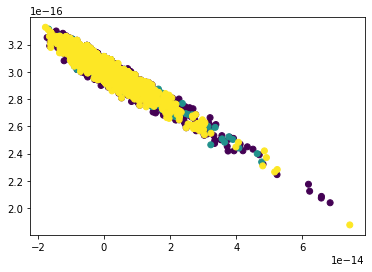

In [151]:

# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn import datasets
# from sklearn.decomposition import PCA

data = latent_vector.drop('category', axis=1)

# fig = plt.figure(figsize=(8, 6))
# ax = Axes3D(fig, elev=-150, azim=110)
# X_reduced = PCA(n_components=3).fit_transform(data)
# ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=latent_vector['category'],
#            cmap=plt.cm.Set1, edgecolor='k', s=40)
# ax.set_title("First three PCA directions")
# ax.set_xlabel("1st eigenvector")
# ax.w_xaxis.set_ticklabels([])
# ax.set_ylabel("2nd eigenvector")
# ax.w_yaxis.set_ticklabels([])
# ax.set_zlabel("3rd eigenvector")
# ax.w_zaxis.set_ticklabels([])

# plt.show()

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pc = pca.fit_transform(data)

import matplotlib.pyplot as plt
plt.scatter(pc[:,0],pc[:,1], c= latent_vector['category'])

In [152]:
data 

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,2.936499e-13,1.942826e-13,1.183957e-13,1.236807e-13,1.201726e-13,1.650183e-13,1.596510e-13,2.979007e-13,2.722333e-12,2.070330e-13,...,2.183612e-13,6.989979e-14,2.287711e-13,8.633519e-13,9.586368e-14,8.130974e-14,3.013231e-13,7.332376e-12,9.418186e-13,1.078050e-11
1,2.937082e-13,1.943230e-13,1.184269e-13,1.237038e-13,1.201820e-13,1.650431e-13,1.596909e-13,2.979422e-13,2.722437e-12,2.070914e-13,...,2.184432e-13,6.991299e-14,2.288309e-13,8.634408e-13,9.589587e-14,8.132121e-14,3.013772e-13,7.333481e-12,9.419928e-13,1.078383e-11
2,2.936757e-13,1.943004e-13,1.184095e-13,1.236906e-13,1.201767e-13,1.650290e-13,1.596687e-13,2.979189e-13,2.722375e-12,2.070587e-13,...,2.183970e-13,6.990552e-14,2.287973e-13,8.633914e-13,9.587794e-14,8.131470e-14,3.013467e-13,7.332851e-12,9.418958e-13,1.078196e-11
3,2.937205e-13,1.943315e-13,1.184337e-13,1.237085e-13,1.201841e-13,1.650485e-13,1.596992e-13,2.979513e-13,2.722463e-12,2.071033e-13,...,2.184599e-13,6.991579e-14,2.288431e-13,8.634606e-13,9.590245e-14,8.132369e-14,3.013887e-13,7.333719e-12,9.420287e-13,1.078451e-11
4,2.937183e-13,1.943300e-13,1.184328e-13,1.237078e-13,1.201838e-13,1.650475e-13,1.596982e-13,2.979501e-13,2.722458e-12,2.071017e-13,...,2.184578e-13,6.991539e-14,2.288418e-13,8.634573e-13,9.590172e-14,8.132339e-14,3.013870e-13,7.333677e-12,9.420234e-13,1.078442e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9322,2.937463e-13,1.943493e-13,1.184477e-13,1.237189e-13,1.201884e-13,1.650592e-13,1.597171e-13,2.979706e-13,2.722515e-12,2.071294e-13,...,2.184966e-13,6.992166e-14,2.288702e-13,8.635001e-13,9.591672e-14,8.132897e-14,3.014128e-13,7.334208e-12,9.421060e-13,1.078601e-11
9323,2.936858e-13,1.943078e-13,1.184151e-13,1.236949e-13,1.201786e-13,1.650337e-13,1.596757e-13,2.979263e-13,2.722401e-12,2.070689e-13,...,2.184116e-13,6.990793e-14,2.288082e-13,8.634078e-13,9.588343e-14,8.131687e-14,3.013565e-13,7.333061e-12,9.419263e-13,1.078255e-11
9324,2.937508e-13,1.943530e-13,1.184504e-13,1.237206e-13,1.201886e-13,1.650611e-13,1.597208e-13,2.979751e-13,2.722520e-12,2.071345e-13,...,2.185036e-13,6.992273e-14,2.288750e-13,8.635066e-13,9.591965e-14,8.132959e-14,3.014169e-13,7.334292e-12,9.421204e-13,1.078630e-11
9325,2.937183e-13,1.943300e-13,1.184328e-13,1.237076e-13,1.201831e-13,1.650472e-13,1.596985e-13,2.979513e-13,2.722452e-12,2.071017e-13,...,2.184578e-13,6.991526e-14,2.288418e-13,8.634556e-13,9.590172e-14,8.132308e-14,3.013864e-13,7.333662e-12,9.420234e-13,1.078442e-11
